In [1]:
# 1. Data Manipulation dan Umum
import numpy as np
import pandas as pd
from collections import Counter

# 2. Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Preprocessing dan Evaluasi Model
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold,
)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    
)

# 4. Model Klasifikasi Scikit-learn
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier,
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# 5. Model Gradient Boosting Tambahan
import xgboost as xgb
# import lightgbm as lgb
from xgboost import XGBClassifier

# 6. Penanganan Data Tidak Seimbang (Imbalanced-learn)
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

# 7. Category Encoders
import category_encoders as ce

# Tambahan jika diperlukan
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LassoCV


# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import cross_val_score

# Ordinal Encoding

In [111]:
df_encoded_ordinal = pd.read_csv('../datasets/encoded_label.csv')

In [112]:
df_encoded_ordinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12296 entries, 0 to 12295
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Time                         12296 non-null  int64
 1   Age_band_of_driver           12296 non-null  int64
 2   Sex_of_driver                12296 non-null  int64
 3   Educational_level            12296 non-null  int64
 4   Vehicle_driver_relation      12296 non-null  int64
 5   Driving_experience           12296 non-null  int64
 6   Type_of_vehicle              12296 non-null  int64
 7   Owner_of_vehicle             12296 non-null  int64
 8   Service_year_of_vehicle      12296 non-null  int64
 9   Area_accident_occured        12296 non-null  int64
 10  Lanes_or_Medians             12296 non-null  int64
 11  Road_allignment              12296 non-null  int64
 12  Types_of_Junction            12296 non-null  int64
 13  Road_surface_type            12296 non-null  i

In [113]:
df_encoded_ordinal.head()

,Time,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,...,Number_of_casualties,Vehicle_movement,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Day
0,17,0,1,0,0,0,3,3,3,8,...,2,2,2,4,3,4,5,3,2,1
1,17,0,1,4,0,3,4,3,2,4,...,2,2,2,4,3,4,5,9,2,1
2,17,0,1,4,0,0,0,3,5,7,...,2,2,1,1,2,4,5,11,1,1
3,1,0,1,4,0,2,4,0,5,4,...,2,2,0,0,2,2,5,11,2,3
4,1,0,1,4,0,1,3,3,2,2,...,2,2,2,4,3,4,5,9,2,3


In [114]:
df_encoded_ordinal.isnull().sum().sum()

0

In [115]:
X = df_encoded_ordinal.drop(columns=['Accident_severity'])
y = df_encoded_ordinal['Accident_severity']

X_train_ordinal, X_test, y_train_ordinal, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [116]:
def evaluate_encoding(X_encoded, name):
    score = np.mean(cross_val_score(RandomForestClassifier(), X_encoded, y_train_ordinal, cv=5))
    print(f"{name}: {score:.4f}")
    return score

print("Cross-Validation Scores:")
# score_ohe = evaluate_encoding(X_train_ohe, "One-Hot Encoding")
score_le = evaluate_encoding(X_train_ordinal, "Ordinal Encoding")
# score_te = evaluate_encoding(X_train_te, "Target Encoding")
# score_freq = evaluate_encoding(X_train_freq, "Frequency Encoding")

print("\nMutual Information Scores:")
mi_scores = {
    # 'One-Hot': mutual_info_classif(X_train_ohe, y_train).mean(),
    'Ordinal Encoding': mutual_info_classif(X_train_ordinal, y_train_ordinal).mean(),
    # 'Target Encoding': mutual_info_classif(X_train_te, y_train).mean(),
    # 'Frequency Encoding': mutual_info_classif(X_train_freq, y_train).mean()
}
for key, value in mi_scores.items():
    print(f"{key}: {value:.4f}")

Cross-Validation Scores:
Ordinal Encoding: 0.8481

Mutual Information Scores:
Ordinal Encoding: 0.0023


In [117]:
model = RandomForestClassifier().fit(X_train_ordinal, y_train_ordinal)
feature_importance = pd.Series(model.feature_importances_, index=X_train_ordinal.columns)
print(feature_importance.sort_values(ascending=False))

Time                           0.100951
Day                            0.067959
Cause_of_accident              0.063958
Area_accident_occured          0.057229
Driving_experience             0.055638
Lanes_or_Medians               0.050600
Number_of_vehicles_involved    0.044671
Service_year_of_vehicle        0.044225
Type_of_vehicle                0.043867
Types_of_Junction              0.041825
Vehicle_movement               0.040422
Number_of_casualties           0.038286
Educational_level              0.037029
Age_band_of_casualty           0.037008
Age_band_of_driver             0.032767
Type_of_collision              0.030398
Sex_of_casualty                0.024575
Fitness_of_casuality           0.020938
Light_conditions               0.020490
Weather_conditions             0.019625
Casualty_severity              0.018867
Vehicle_driver_relation        0.018463
Road_surface_conditions        0.017924
Road_allignment                0.017723
Pedestrian_movement            0.017001


In [118]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_ordinal, y_train_ordinal)
rf_pred = rf_model.predict(X_test)

ordinal_rf_f1_score = f1_score(y_test, rf_pred, average='weighted')
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1_weighted')
ordinal_rf_cv = rf_cv_scores.mean()

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_ordinal, y_train_ordinal)
xgb_pred = xgb_model.predict(X_test)

ordinal_xgb_f1_score = f1_score(y_test, xgb_pred, average='weighted')
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='f1_weighted')
ordinal_xgb_cv = xgb_cv_scores.mean()

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_ordinal, y_train_ordinal)
knn_pred = knn_model.predict(X_test)

ordinal_knn_f1_score = f1_score(y_test, knn_pred, average='weighted')
knn_cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='f1_weighted')
ordinal_knn_cv = knn_cv_scores.mean()

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train_ordinal, y_train_ordinal)
logreg_pred = logreg_model.predict(X_test)

ordinal_logreg_f1_score = f1_score(y_test, logreg_pred, average='weighted')
logreg_cv_scores = cross_val_score(logreg_model, X, y, cv=5, scoring='f1_weighted')
ordinal_logreg_cv = logreg_cv_scores.mean()

# Extra Trees
extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees_model.fit(X_train_ordinal, y_train_ordinal)
extra_trees_pred = extra_trees_model.predict(X_test)

ordinal_extra_trees_f1_score = f1_score(y_test, extra_trees_pred, average='weighted')
extra_trees_cv_scores = cross_val_score(extra_trees_model, X, y, cv=5, scoring='f1_weighted')
ordinal_extra_trees_cv = extra_trees_cv_scores.mean()

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_ordinal, y_train_ordinal)
gb_pred = gb_model.predict(X_test)

ordinal_gb_f1_score = f1_score(y_test, gb_pred, average='weighted')
gb_cv_scores = cross_val_score(gb_model, X, y, cv=5, scoring='f1_weighted')
ordinal_gb_cv = gb_cv_scores.mean()

print("Random Forest\t\t -> F1 Score:", ordinal_rf_f1_score, "Cross-Validation F1 Score:", ordinal_rf_cv)
print("XGBoost\t\t\t -> F1 Score:", ordinal_xgb_f1_score, "Cross-Validation F1 Score:", ordinal_xgb_cv)
print("KNN\t\t\t -> F1 Score:", ordinal_knn_f1_score, "Cross-Validation F1 Score:", ordinal_knn_cv)
print("Logistic Regression\t -> F1 Score:", ordinal_logreg_f1_score, "Cross-Validation F1 Score:", ordinal_logreg_cv)
print("Extra Trees\t\t -> F1 Score:", ordinal_extra_trees_f1_score, "Cross-Validation F1 Score:", ordinal_extra_trees_cv)
print("Gradient Boosting\t -> F1 Score:", ordinal_gb_f1_score, "Cross-Validation F1 Score:", ordinal_gb_cv)


C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:40:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:40:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:40:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

Random Forest		 -> F1 Score: 0.7780535988447094 Cross-Validation F1 Score: 0.7781573758459753
XGBoost			 -> F1 Score: 0.8065751796157861 Cross-Validation F1 Score: 0.7900133469415439
KNN			 -> F1 Score: 0.7698761508322021 Cross-Validation F1 Score: 0.776552859193384
Logistic Regression	 -> F1 Score: 0.7753317112558925 Cross-Validation F1 Score: 0.7752608859289839
Extra Trees		 -> F1 Score: 0.7807216971341048 Cross-Validation F1 Score: 0.7815537044786545
Gradient Boosting	 -> F1 Score: 0.7863801336805892 Cross-Validation F1 Score: 0.7827910728712185


# One-Hot Encoding

In [119]:
df_encoded_ohe = pd.read_csv('../datasets/encoded_ohe.csv')

In [120]:
df_encoded_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12296 entries, 0 to 12295
Columns: 180 entries, Number_of_vehicles_involved to Weather_conditions_Windy
dtypes: int64(180)
memory usage: 16.9 MB


In [121]:
df_encoded_ohe.head()

,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Age_band_of_casualty_18-30,Age_band_of_casualty_31-50,Age_band_of_casualty_Over 51,Age_band_of_casualty_Under 18,Age_band_of_casualty_unknown,Age_band_of_driver_Dewasa,Age_band_of_driver_Lansia,...,Vehicle_movement_Unknown,Weather_conditions_Cloudy,Weather_conditions_Fog or mist,Weather_conditions_Normal,Weather_conditions_Other,Weather_conditions_Raining,Weather_conditions_Raining and Windy,Weather_conditions_Snow,Weather_conditions_Unknown,Weather_conditions_Windy
0,2,2,2,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1,2,2,2,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2,2,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,2,2,2,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2,2,2,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [122]:
df_encoded_ohe.isna().sum().sum()

0

In [123]:
X = df_encoded_ohe.drop(columns=['Accident_severity'])
y = df_encoded_ohe['Accident_severity']

X_train_ohe, X_test, y_train_ohe, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [124]:
def evaluate_encoding(X_encoded, name):
    score = np.mean(cross_val_score(RandomForestClassifier(), X_encoded, y_train_ohe, cv=5))
    print(f"{name}: {score:.4f}")
    return score

print("Cross-Validation Scores:")
score_ohe = evaluate_encoding(X_train_ohe, "One-Hot Encoding")
# score_le = evaluate_encoding(X_train, "Label Encoding")
# score_te = evaluate_encoding(X_train_te, "Target Encoding")
# score_freq = evaluate_encoding(X_train_freq, "Frequency Encoding")

print("\nMutual Information Scores:")
mi_scores = {
    'One-Hot Encoding': mutual_info_classif(X_train_ohe, y_train_ohe).mean(),
    # 'Label Encoding': mutual_info_classif(X_train_le, y_train).mean(),
    # 'Target Encoding': mutual_info_classif(X_train_te, y_train).mean(),
    # 'Frequency Encoding': mutual_info_classif(X_train_freq, y_train).mean()
}
for key, value in mi_scores.items():
    print(f"{key}: {value:.4f}")

Cross-Validation Scores:
One-Hot Encoding: 0.8475

Mutual Information Scores:
One-Hot Encoding: 0.0016


In [125]:
model = RandomForestClassifier().fit(X_train_ohe, y_train_ohe)
feature_importance = pd.Series(model.feature_importances_, index=X_train_ohe.columns)
print(feature_importance.sort_values(ascending=False))  

Number_of_vehicles_involved                                                                                                                                  0.035836
Number_of_casualties                                                                                                                                         0.025814
Type_of_vehicle_Private Vehicle                                                                                                                              0.013492
Service_year_of_vehicle_Unknown                                                                                                                              0.013460
Types_of_Junction_Y Shape                                                                                                                                    0.013240
                                                                                                                                                               ...   
Weat

In [126]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_ohe, y_train_ohe)
rf_pred = rf_model.predict(X_test)

ohe_rf_f1_score = f1_score(y_test, rf_pred, average='weighted')
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1_weighted')
ohe_rf_cv = rf_cv_scores.mean()

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_ohe, y_train_ohe)
xgb_pred = xgb_model.predict(X_test)

ohe_xgb_f1_score = f1_score(y_test, xgb_pred, average='weighted')
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='f1_weighted')
ohe_xgb_cv = xgb_cv_scores.mean()

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_ohe, y_train_ohe)
knn_pred = knn_model.predict(X_test)

ohe_knn_f1_score = f1_score(y_test, knn_pred, average='weighted')
knn_cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='f1_weighted')
ohe_knn_cv = knn_cv_scores.mean()

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train_ohe, y_train_ohe)
logreg_pred = logreg_model.predict(X_test)

ohe_logreg_f1_score = f1_score(y_test, logreg_pred, average='weighted')
logreg_cv_scores = cross_val_score(logreg_model, X, y, cv=5, scoring='f1_weighted')
ohe_logreg_cv = logreg_cv_scores.mean()

# Extra Trees
extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees_model.fit(X_train_ohe, y_train_ohe)
extra_trees_pred = extra_trees_model.predict(X_test)

ohe_extra_trees_f1_score = f1_score(y_test, extra_trees_pred, average='weighted')
extra_trees_cv_scores = cross_val_score(extra_trees_model, X, y, cv=5, scoring='f1_weighted')
ohe_extra_trees_cv = extra_trees_cv_scores.mean()

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_ohe, y_train_ohe)
gb_pred = gb_model.predict(X_test)

ohe_gb_f1_score = f1_score(y_test, gb_pred, average='weighted')
gb_cv_scores = cross_val_score(gb_model, X, y, cv=5, scoring='f1_weighted')
ohe_gb_cv = gb_cv_scores.mean()

print("Random Forest\t\t -> F1 Score:", ohe_rf_f1_score, "Cross-Validation F1 Score:", ohe_rf_cv)
print("XGBoost\t\t\t -> F1 Score:", ohe_xgb_f1_score, "Cross-Validation F1 Score:", ohe_xgb_cv)
print("KNN\t\t\t -> F1 Score:", ohe_knn_f1_score, "Cross-Validation F1 Score:", ohe_knn_cv)
print("Logistic Regression\t -> F1 Score:", ohe_logreg_f1_score, "Cross-Validation F1 Score:", ohe_logreg_cv)
print("Extra Trees\t\t -> F1 Score:", ohe_extra_trees_f1_score, "Cross-Validation F1 Score:", ohe_extra_trees_cv)
print("Gradient Boosting\t -> F1 Score:", ohe_gb_f1_score, "Cross-Validation F1 Score:", ohe_gb_cv)


C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:41:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:41:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:41:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

Random Forest		 -> F1 Score: 0.7763131610656833 Cross-Validation F1 Score: 0.775652551765879
XGBoost			 -> F1 Score: 0.8059528868980814 Cross-Validation F1 Score: 0.7887827684810069
KNN			 -> F1 Score: 0.7853001611869224 Cross-Validation F1 Score: 0.7821442612968064
Logistic Regression	 -> F1 Score: 0.7778447585612219 Cross-Validation F1 Score: 0.7759850670459498
Extra Trees		 -> F1 Score: 0.779019205475845 Cross-Validation F1 Score: 0.7788667598404019
Gradient Boosting	 -> F1 Score: 0.7883860963879212 Cross-Validation F1 Score: 0.7873701269008627


# Target Encoding

In [127]:
df_encoded_target = pd.read_csv('../datasets/encoded_target.csv')

In [128]:
df_encoded_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12296 entries, 0 to 12295
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time                         12296 non-null  float64
 1   Age_band_of_driver           12296 non-null  float64
 2   Sex_of_driver                12296 non-null  float64
 3   Educational_level            12296 non-null  float64
 4   Vehicle_driver_relation      12296 non-null  float64
 5   Driving_experience           12296 non-null  float64
 6   Type_of_vehicle              12296 non-null  float64
 7   Owner_of_vehicle             12296 non-null  float64
 8   Service_year_of_vehicle      12296 non-null  float64
 9   Area_accident_occured        12296 non-null  float64
 10  Lanes_or_Medians             12296 non-null  float64
 11  Road_allignment              12296 non-null  float64
 12  Types_of_Junction            12296 non-null  float64
 13  Road_surface_typ

In [129]:
df_encoded_target.head()

,Time,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,...,Number_of_casualties,Vehicle_movement,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Day
0,1.857843,1.83563,1.831932,1.830556,1.834806,1.846154,1.833100,1.831243,1.841390,1.806796,...,2,1.834306,1.840812,1.838427,1.840812,1.837209,1.83433,1.811785,2,1.864286
1,1.857843,1.83563,1.831932,1.832195,1.834806,1.831490,1.830928,1.831243,1.825781,1.839757,...,2,1.834306,1.840812,1.838427,1.840812,1.837209,1.83433,1.796687,2,1.864286
2,1.857843,1.83563,1.831932,1.832195,1.834806,1.846154,1.826220,1.831243,1.834045,1.829268,...,2,1.834306,1.823036,1.835510,1.826444,1.837209,1.83433,1.831912,1,1.864286
3,1.813433,1.83563,1.831932,1.832195,1.834806,1.834768,1.830928,1.843420,1.834045,1.839757,...,2,1.834306,1.839893,1.812998,1.826444,1.832103,1.83433,1.831912,2,1.823329
4,1.813433,1.83563,1.831932,1.832195,1.834806,1.819923,1.833100,1.831243,1.825781,1.842105,...,2,1.834306,1.840812,1.838427,1.840812,1.837209,1.83433,1.796687,2,1.823329


In [130]:
df_encoded_target.isna().sum().sum()

0

In [131]:
X = df_encoded_target.drop(columns=['Accident_severity'])
y = df_encoded_target['Accident_severity']

X_train_target, X_test, y_train_target, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [132]:
def evaluate_encoding(X_encoded, name):
    score = np.mean(cross_val_score(RandomForestClassifier(), X_encoded, y_train_target, cv=5))
    print(f"{name}: {score:.4f}")
    return score

print("Cross-Validation Scores:")
# score_ohe = evaluate_encoding(X_train, "One-Hot Encoding")
# score_le = evaluate_encoding(X_train, "Label Encoding")
score_te = evaluate_encoding(X_train_target, "Target Encoding")
# score_freq = evaluate_encoding(X_train_freq, "Frequency Encoding")

print("\nMutual Information Scores:")
mi_scores = {
    # 'One-Hot': mutual_info_classif(X_train, y_train).mean(),
    # 'Label Encoding': mutual_info_classif(X_train_le, y_train).mean(),
    'Target Encoding': mutual_info_classif(X_train_target, y_train_target).mean(),
    # 'Frequency Encoding': mutual_info_classif(X_train_freq, y_train).mean()
}
for key, value in mi_scores.items():
    print(f"{key}: {value:.4f}")

Cross-Validation Scores:
Target Encoding: 0.8483

Mutual Information Scores:
Target Encoding: 0.0025


In [133]:
model = RandomForestClassifier().fit(X_train_target, y_train_target)
feature_importance = pd.Series(model.feature_importances_, index=X_train_target.columns)
print(feature_importance.sort_values(ascending=False))

Time                           0.094448
Day                            0.067892
Cause_of_accident              0.063977
Area_accident_occured          0.055280
Driving_experience             0.055062
Lanes_or_Medians               0.049601
Service_year_of_vehicle        0.047887
Type_of_vehicle                0.046435
Number_of_vehicles_involved    0.044079
Types_of_Junction              0.042593
Age_band_of_casualty           0.038246
Vehicle_movement               0.037740
Number_of_casualties           0.037078
Educational_level              0.036673
Age_band_of_driver             0.034241
Type_of_collision              0.033726
Sex_of_casualty                0.024679
Light_conditions               0.023914
Fitness_of_casuality           0.020737
Weather_conditions             0.020275
Casualty_severity              0.018432
Vehicle_driver_relation        0.018155
Road_surface_conditions        0.017882
Road_allignment                0.016565
Pedestrian_movement            0.015873


In [134]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_target, y_train_target)
rf_pred = rf_model.predict(X_test)

target_rf_f1_score = f1_score(y_test, rf_pred, average='weighted')
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1_weighted')
target_rf_cv = rf_cv_scores.mean()

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_target, y_train_target)
xgb_pred = xgb_model.predict(X_test)

target_xgb_f1_score = f1_score(y_test, xgb_pred, average='weighted')
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='f1_weighted')
target_xgb_cv = xgb_cv_scores.mean()

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_target, y_train_target)
knn_pred = knn_model.predict(X_test)

target_knn_f1_score = f1_score(y_test, knn_pred, average='weighted')
knn_cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='f1_weighted')
target_knn_cv = knn_cv_scores.mean()

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train_target, y_train_target)
logreg_pred = logreg_model.predict(X_test)

target_logreg_f1_score = f1_score(y_test, logreg_pred, average='weighted')
logreg_cv_scores = cross_val_score(logreg_model, X, y, cv=5, scoring='f1_weighted')
target_logreg_cv = logreg_cv_scores.mean()

# Extra Trees
extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees_model.fit(X_train_target, y_train_target)
extra_trees_pred = extra_trees_model.predict(X_test)

target_extra_trees_f1_score = f1_score(y_test, extra_trees_pred, average='weighted')
extra_trees_cv_scores = cross_val_score(extra_trees_model, X, y, cv=5, scoring='f1_weighted')
target_extra_trees_cv = extra_trees_cv_scores.mean()

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_target, y_train_target)
gb_pred = gb_model.predict(X_test)

target_gb_f1_score = f1_score(y_test, gb_pred, average='weighted')
gb_cv_scores = cross_val_score(gb_model, X, y, cv=5, scoring='f1_weighted')
target_gb_cv = gb_cv_scores.mean()

print("Random Forest\t\t -> F1 Score:", target_rf_f1_score, "Cross-Validation F1 Score:", target_rf_cv)
print("XGBoost\t\t\t -> F1 Score:", target_xgb_f1_score, "Cross-Validation F1 Score:", target_xgb_cv)
print("KNN\t\t\t -> F1 Score:", target_knn_f1_score, "Cross-Validation F1 Score:", target_knn_cv)
print("Logistic Regression\t -> F1 Score:", target_logreg_f1_score, "Cross-Validation F1 Score:", target_logreg_cv)
print("Extra Trees\t\t -> F1 Score:", target_extra_trees_f1_score, "Cross-Validation F1 Score:", target_extra_trees_cv)
print("Gradient Boosting\t -> F1 Score:", target_gb_f1_score, "Cross-Validation F1 Score:", target_gb_cv)


C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:42:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:42:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:42:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

Random Forest		 -> F1 Score: 0.7782623892498449 Cross-Validation F1 Score: 0.7778052676575216
XGBoost			 -> F1 Score: 0.8064923794875875 Cross-Validation F1 Score: 0.7887919111680166
KNN			 -> F1 Score: 0.803496180663444 Cross-Validation F1 Score: 0.7881377857781608
Logistic Regression	 -> F1 Score: 0.7753317112558925 Cross-Validation F1 Score: 0.7752608859289839
Extra Trees		 -> F1 Score: 0.7879738054674976 Cross-Validation F1 Score: 0.7855870197518424
Gradient Boosting	 -> F1 Score: 0.7912643104576311 Cross-Validation F1 Score: 0.7855155405108427


# K-FOLD Encoding

In [135]:
df_encoded_kfold = pd.read_csv('../datasets/encoded_kfold.csv')

In [136]:
df_encoded_kfold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12296 entries, 0 to 12295
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Number_of_vehicles_involved      12296 non-null  int64  
 1   Number_of_casualties             12296 non-null  int64  
 2   Accident_severity                12296 non-null  int64  
 3   Time_encoded                     12296 non-null  float64
 4   Age_band_of_driver_encoded       12296 non-null  float64
 5   Sex_of_driver_encoded            12296 non-null  float64
 6   Educational_level_encoded        12296 non-null  float64
 7   Vehicle_driver_relation_encoded  12296 non-null  float64
 8   Driving_experience_encoded       12296 non-null  float64
 9   Type_of_vehicle_encoded          12296 non-null  float64
 10  Owner_of_vehicle_encoded         12296 non-null  float64
 11  Service_year_of_vehicle_encoded  12296 non-null  float64
 12  Area_accident_occu

In [137]:
df_encoded_kfold.head()

,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Time_encoded,Age_band_of_driver_encoded,Sex_of_driver_encoded,Educational_level_encoded,Vehicle_driver_relation_encoded,Driving_experience_encoded,Type_of_vehicle_encoded,...,Weather_conditions_encoded,Type_of_collision_encoded,Vehicle_movement_encoded,Sex_of_casualty_encoded,Age_band_of_casualty_encoded,Casualty_severity_encoded,Fitness_of_casuality_encoded,Pedestrian_movement_encoded,Cause_of_accident_encoded,Day_encoded
0,2,2,2,1.858859,1.839339,1.832658,1.816327,1.834763,1.856330,1.832211,...,1.828962,1.818667,1.836234,1.840357,1.837924,1.840357,1.837264,1.835567,1.799342,1.868401
1,2,2,2,1.863450,1.833484,1.828528,1.829720,1.831345,1.826158,1.828852,...,1.824391,1.833895,1.829303,1.835586,1.833778,1.835586,1.829889,1.831704,1.788868,1.857143
2,2,2,1,1.852729,1.834851,1.834373,1.834109,1.838140,1.844460,1.823250,...,1.827177,1.822481,1.835802,1.822914,1.834257,1.825842,1.839441,1.836024,1.831005,1.860759
3,2,2,2,1.837838,1.839339,1.832658,1.833608,1.834763,1.836674,1.834716,...,1.828962,1.841928,1.836234,1.838242,1.816115,1.827679,1.833333,1.835567,1.835800,1.816132
4,2,2,2,1.819820,1.833484,1.828528,1.829720,1.831345,1.818225,1.830390,...,1.824391,1.833895,1.829303,1.835586,1.833778,1.835586,1.829889,1.831704,1.788868,1.817708


In [138]:
df_encoded_kfold.isna().sum().sum()

0

In [139]:
X = df_encoded_kfold.drop(columns=['Accident_severity'])
y = df_encoded_kfold['Accident_severity']

X_train_kfold, X_test, y_train_kfold, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [140]:
def evaluate_encoding(X_encoded, name):
    score = np.mean(cross_val_score(RandomForestClassifier(), X_encoded, y_train_kfold, cv=5))
    print(f"{name}: {score:.4f}")
    return score

print("Cross-Validation Scores:")
# score_ohe = evaluate_encoding(X_train, "One-Hot Encoding")
# score_le = evaluate_encoding(X_train, "Label Encoding")
# score_te = evaluate_encoding(X_train, "Target Encoding")
score_freq = evaluate_encoding(X_train_kfold, "Kfold Target Encoding")

print("\nMutual Information Scores:")
mi_scores = {
    # 'One-Hot': mutual_info_classif(X_train, y_train).mean(),
    # 'Label Encoding': mutual_info_classif(X_train_le, y_train).mean(),
    # 'Target Encoding': mutual_info_classif(X_train, y_train).mean(),
    'Kfold Target Encoding': mutual_info_classif(X_train_kfold, y_train_kfold).mean()
}
for key, value in mi_scores.items():
    print(f"{key}: {value:.4f}")

Cross-Validation Scores:
Kfold Target Encoding: 0.8473

Mutual Information Scores:
Kfold Target Encoding: 0.0028


In [141]:
model = RandomForestClassifier().fit(X_train_kfold, y_train_kfold)
feature_importance = pd.Series(model.feature_importances_, index=X_train_kfold.columns)
print(feature_importance.sort_values(ascending=False))

Time_encoded                       0.079970
Day_encoded                        0.061344
Cause_of_accident_encoded          0.060567
Area_accident_occured_encoded      0.055065
Driving_experience_encoded         0.051053
Service_year_of_vehicle_encoded    0.047855
Lanes_or_Medians_encoded           0.046309
Type_of_vehicle_encoded            0.045161
Types_of_Junction_encoded          0.044079
Age_band_of_casualty_encoded       0.039560
Number_of_vehicles_involved        0.038737
Educational_level_encoded          0.037323
Vehicle_movement_encoded           0.036946
Type_of_collision_encoded          0.035934
Age_band_of_driver_encoded         0.034252
Number_of_casualties               0.030208
Sex_of_casualty_encoded            0.029562
Light_conditions_encoded           0.027738
Fitness_of_casuality_encoded       0.024134
Casualty_severity_encoded          0.023700
Vehicle_driver_relation_encoded    0.022427
Road_surface_conditions_encoded    0.020930
Weather_conditions_encoded      

In [142]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_kfold, y_train_kfold)
rf_pred = rf_model.predict(X_test)

kfold_rf_f1_score = f1_score(y_test, rf_pred, average='weighted')
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1_weighted')
kfold_rf_cv = rf_cv_scores.mean()

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_kfold, y_train_kfold)
xgb_pred = xgb_model.predict(X_test)

kfold_xgb_f1_score = f1_score(y_test, xgb_pred, average='weighted')
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='f1_weighted')
kfold_xgb_cv = xgb_cv_scores.mean()

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_kfold, y_train_kfold)
knn_pred = knn_model.predict(X_test)

kfold_knn_f1_score = f1_score(y_test, knn_pred, average='weighted')
knn_cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='f1_weighted')
kfold_knn_cv = knn_cv_scores.mean()

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train_kfold, y_train_kfold)
logreg_pred = logreg_model.predict(X_test)

kfold_logreg_f1_score = f1_score(y_test, logreg_pred, average='weighted')
logreg_cv_scores = cross_val_score(logreg_model, X, y, cv=5, scoring='f1_weighted')
kfold_logreg_cv = logreg_cv_scores.mean()

# Extra Trees
extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees_model.fit(X_train_kfold, y_train_kfold)
extra_trees_pred = extra_trees_model.predict(X_test)

kfold_extra_trees_f1_score = f1_score(y_test, extra_trees_pred, average='weighted')
extra_trees_cv_scores = cross_val_score(extra_trees_model, X, y, cv=5, scoring='f1_weighted')
kfold_extra_trees_cv = extra_trees_cv_scores.mean()

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_kfold, y_train_kfold)
gb_pred = gb_model.predict(X_test)

kfold_gb_f1_score = f1_score(y_test, gb_pred, average='weighted')
gb_cv_scores = cross_val_score(gb_model, X, y, cv=5, scoring='f1_weighted')
kfold_gb_cv = gb_cv_scores.mean()

print("Random Forest\t\t -> F1 Score:", kfold_rf_f1_score, "Cross-Validation F1 Score:", kfold_rf_cv)
print("XGBoost\t\t\t -> F1 Score:", kfold_xgb_f1_score, "Cross-Validation F1 Score:", kfold_xgb_cv)
print("KNN\t\t\t -> F1 Score:", kfold_knn_f1_score, "Cross-Validation F1 Score:", kfold_knn_cv)
print("Logistic Regression\t -> F1 Score:", kfold_logreg_f1_score, "Cross-Validation F1 Score:", kfold_logreg_cv)
print("Extra Trees\t\t -> F1 Score:", kfold_extra_trees_f1_score, "Cross-Validation F1 Score:", kfold_extra_trees_cv)
print("Gradient Boosting\t -> F1 Score:", kfold_gb_f1_score, "Cross-Validation F1 Score:", kfold_gb_cv)


C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:46:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:46:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:46:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

Random Forest		 -> F1 Score: 0.7761089507087952 Cross-Validation F1 Score: 0.7756450243843476
XGBoost			 -> F1 Score: 0.7905432522928929 Cross-Validation F1 Score: 0.7868941830613099
KNN			 -> F1 Score: 0.8044633479139843 Cross-Validation F1 Score: 0.7869022011130556
Logistic Regression	 -> F1 Score: 0.7753317112558925 Cross-Validation F1 Score: 0.7752608859289839
Extra Trees		 -> F1 Score: 0.7818277285165518 Cross-Validation F1 Score: 0.7817027378964375
Gradient Boosting	 -> F1 Score: 0.783622835384223 Cross-Validation F1 Score: 0.7816384999198606


# MIX Encoding

In [2]:
df_encoded_mix = pd.read_csv('../datasets/encoded.csv')

In [3]:
df_encoded_mix['Number_of_casualties'].value_counts()

Number_of_casualties
1    8381
2    2288
3     909
4     394
5     206
6      88
7      22
8       8
Name: count, dtype: int64

In [4]:
df_encoded_mix['Number_of_vehicles_involved'].value_counts()

Number_of_vehicles_involved
2    8328
1    1992
3    1565
4     362
6      42
7       7
Name: count, dtype: int64

In [144]:
df_encoded_mix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12296 entries, 0 to 12295
Data columns (total 58 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age_band_of_driver                                  12296 non-null  int64  
 1   Educational_level                                   12296 non-null  int64  
 2   Driving_experience                                  12296 non-null  int64  
 3   Service_year_of_vehicle                             12296 non-null  int64  
 4   Number_of_vehicles_involved                         12296 non-null  int64  
 5   Number_of_casualties                                12296 non-null  int64  
 6   Age_band_of_casualty                                12296 non-null  int64  
 7   Casualty_severity                                   12296 non-null  int64  
 8   Accident_severity                                   12296 non-null  int64  


In [145]:
df_encoded_mix.isna().sum().sum()

0

In [ ]:
X = df_encoded_mix.drop(columns=['Accident_severity'])
y = df_encoded_mix['Accident_severity']

X_train_mix, X_test, y_train_mix, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [147]:
def evaluate_encoding(X_encoded, name):
    score = np.mean(cross_val_score(RandomForestClassifier(), X_encoded, y_train_mix, cv=5))
    print(f"{name}: {score:.4f}")
    return score

print("Cross-Validation Scores:")
# score_ohe = evaluate_encoding(X_train, "One-Hot Encoding")
# score_le = evaluate_encoding(X_train, "Label Encoding")
# score_te = evaluate_encoding(X_train, "Target Encoding")
score_freq = evaluate_encoding(X_train_mix, "Mix Encoding")

print("\nMutual Information Scores:")
mi_scores = {
    # 'One-Hot': mutual_info_classif(X_train, y_train).mean(),
    # 'Label Encoding': mutual_info_classif(X_train_le, y_train).mean(),
    # 'Target Encoding': mutual_info_classif(X_train, y_train).mean(),
    'MixEncoding': mutual_info_classif(X_train_mix, y_train_mix).mean()
}
for key, value in mi_scores.items():
    print(f"{key}: {value:.4f}")

Cross-Validation Scores:
Mix Encoding: 0.8468

Mutual Information Scores:
MixEncoding: 0.0019


In [148]:
model = RandomForestClassifier().fit(X_train_mix, y_train_mix)
feature_importance = pd.Series(model.feature_importances_, index=X_train_mix.columns)
print(feature_importance.sort_values(ascending=False))  

Time_encoded                                          0.079449
Cause_of_accident_encoded                             0.060222
Area_accident_occured_encoded                         0.058063
Lanes_or_Medians_encoded                              0.051872
Type_of_vehicle_encoded                               0.050052
Types_of_Junction_encoded                             0.049403
Vehicle_movement_encoded                              0.043719
Type_of_collision_encoded                             0.043622
Driving_experience                                    0.040398
Number_of_vehicles_involved                           0.038948
Service_year_of_vehicle                               0.032540
Number_of_casualties                                  0.030658
Weather_conditions_encoded                            0.030382
Pedestrian_movement_encoded                           0.028989
Road_allignment_encoded                               0.028438
Age_band_of_casualty                                  0

In [149]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_mix, y_train_mix)
rf_pred = rf_model.predict(X_test)

mix_rf_f1_score = f1_score(y_test, rf_pred, average='weighted')
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1_weighted')
mix_rf_cv = rf_cv_scores.mean()

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_mix, y_train_mix)
xgb_pred = xgb_model.predict(X_test)

mix_xgb_f1_score = f1_score(y_test, xgb_pred, average='weighted')
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='f1_weighted')
mix_xgb_cv = xgb_cv_scores.mean()

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_mix, y_train_mix)
knn_pred = knn_model.predict(X_test)

mix_knn_f1_score = f1_score(y_test, knn_pred, average='weighted')
knn_cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='f1_weighted')
mix_knn_cv = knn_cv_scores.mean()

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train_mix, y_train_mix)
logreg_pred = logreg_model.predict(X_test)

mix_logreg_f1_score = f1_score(y_test, logreg_pred, average='weighted')
logreg_cv_scores = cross_val_score(logreg_model, X, y, cv=5, scoring='f1_weighted')
mix_logreg_cv = logreg_cv_scores.mean()

# Extra Trees
extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees_model.fit(X_train_mix, y_train_mix)
extra_trees_pred = extra_trees_model.predict(X_test)

mix_extra_trees_f1_score = f1_score(y_test, extra_trees_pred, average='weighted')
extra_trees_cv_scores = cross_val_score(extra_trees_model, X, y, cv=5, scoring='f1_weighted')
mix_extra_trees_cv = extra_trees_cv_scores.mean()

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_mix, y_train_mix)
gb_pred = gb_model.predict(X_test)

mix_gb_f1_score = f1_score(y_test, gb_pred, average='weighted')
gb_cv_scores = cross_val_score(gb_model, X, y, cv=5, scoring='f1_weighted')
mix_gb_cv = gb_cv_scores.mean()

print("Random Forest\t\t -> F1 Score:", mix_rf_f1_score, "Cross-Validation F1 Score:", mix_rf_cv)
print("XGBoost\t\t\t -> F1 Score:", mix_xgb_f1_score, "Cross-Validation F1 Score:", mix_xgb_cv)
print("KNN\t\t\t -> F1 Score:", mix_knn_f1_score, "Cross-Validation F1 Score:", mix_knn_cv)
print("Logistic Regression\t -> F1 Score:", mix_logreg_f1_score, "Cross-Validation F1 Score:", mix_logreg_cv)
print("Extra Trees\t\t -> F1 Score:", mix_extra_trees_f1_score, "Cross-Validation F1 Score:", mix_extra_trees_cv)
print("Gradient Boosting\t -> F1 Score:", mix_gb_f1_score, "Cross-Validation F1 Score:", mix_gb_cv)

C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:47:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:47:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [12:47:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

Random Forest		 -> F1 Score: 0.7753317112558925 Cross-Validation F1 Score: 0.7752608859289839
XGBoost			 -> F1 Score: 0.7929266651310093 Cross-Validation F1 Score: 0.7855573990370417
KNN			 -> F1 Score: 0.7767167701754903 Cross-Validation F1 Score: 0.7722822958769145
Logistic Regression	 -> F1 Score: 0.7753317112558925 Cross-Validation F1 Score: 0.7751800835104665
Extra Trees		 -> F1 Score: 0.784049340224471 Cross-Validation F1 Score: 0.7811897598869213
Gradient Boosting	 -> F1 Score: 0.7836446395103212 Cross-Validation F1 Score: 0.7821075994300345


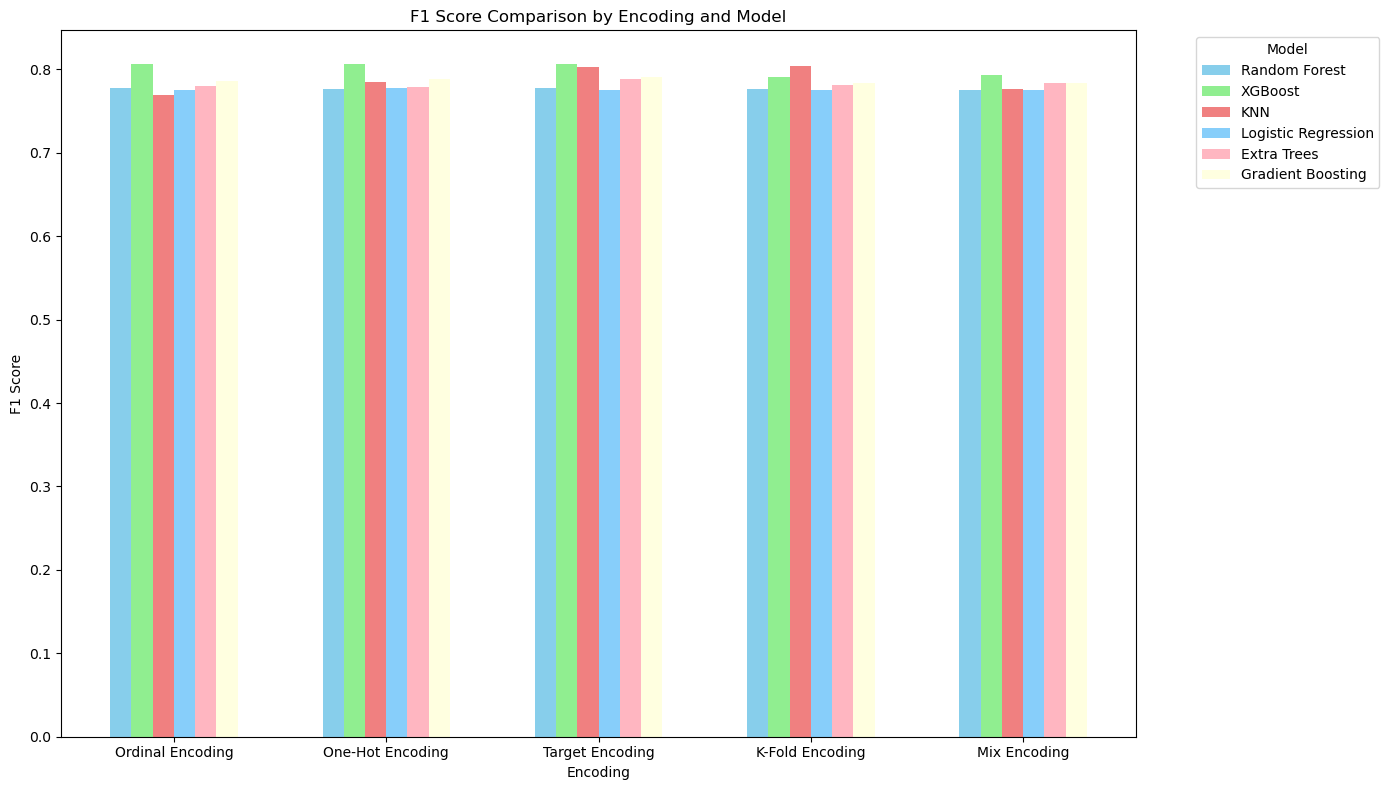

In [ ]:
# Data
encodings = ['Ordinal Encoding', 'One-Hot Encoding', 'Target Encoding', 'K-Fold Encoding', 'Mix Encoding']
models = ['Random Forest', 'XGBoost', 'KNN', 'Logistic Regression', 'Extra Trees', 'Gradient Boosting']

# F1 scores untuk setiap model di bawah encoding yang sesuai
f1_scores = {
    'Ordinal Encoding': [ordinal_rf_f1_score, ordinal_xgb_f1_score, ordinal_knn_f1_score, ordinal_logreg_f1_score, ordinal_extra_trees_f1_score, ordinal_gb_f1_score],
    'One-Hot Encoding': [ohe_rf_f1_score, ohe_xgb_f1_score, ohe_knn_f1_score, ohe_logreg_f1_score, ohe_extra_trees_f1_score, ohe_gb_f1_score],
    'Target Encoding': [target_rf_f1_score, target_xgb_f1_score, target_knn_f1_score, target_logreg_f1_score, target_extra_trees_f1_score, target_gb_f1_score],
    'K-Fold Encoding': [kfold_rf_f1_score, kfold_xgb_f1_scoxre, kfold_knn_f1_score, kfold_logreg_f1_score, kfold_extra_trees_f1_score, kfold_gb_f1_score],
    'Mix Encoding': [mix_rf_f1_score, mix_xgb_f1_score, mix_knn_f1_score, mix_logreg_f1_score, mix_extra_trees_f1_score, mix_gb_f1_score]
}

# Warna untuk setiap model
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'lightyellow', 'lightgray']

# Posisi bar di sumbu x
x = np.arange(len(encodings))  # Posisi encoding
width = 0.1  # Lebar bar untuk setiap model

# Membuat plot
plt.figure(figsize=(14, 8))

# Plot bar untuk setiap model
for i, model in enumerate(models):
    model_scores = [f1_scores[encoding][i] for encoding in encodings]  # Ambil F1 score untuk model ini di semua encoding
    plt.bar(x + i * width, model_scores, width=width, label=model, color=colors[i])

# Menambahkan label, judul, dan legenda
plt.xlabel('Encoding')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison by Encoding and Model')
plt.xticks(x + width * (len(models) / 2 - 0.5), encodings)  # Posisi label encoding di tengah grup bar
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menampilkan plot
plt.tight_layout()
plt.show()

# Outlier

In [151]:
df_encoded_mix['Number_of_casualties'].value_counts()

Number_of_casualties
1    8381
2    2288
3     909
4     394
5     206
6      88
7      22
8       8
Name: count, dtype: int64

In [152]:
df_encoded_mix['Number_of_vehicles_involved'].value_counts()

Number_of_vehicles_involved
2    8328
1    1992
3    1565
4     362
6      42
7       7
Name: count, dtype: int64

In [153]:
def std(data: list, ddof: int = 1) -> float:
    if ddof > 1 or ddof < 0:
        raise ValueError('ddof must be greater than 0')
    n = len(data)
    mean = sum(data) / n
    total_variance = sum((x - mean) ** 2 for x in data)
    variance = total_variance / (n - ddof)
    stdev = variance ** 0.5
    return stdev

def z_scores_1(num, data):
    mean = sum(data) / len(data)
    std_dev = std(data)
    return (num - mean) / std_dev

def detect_outliers(data, threshold=3):
    outliers = []
    mean = sum(data) / len(data)
    stdev_value = std(data)
    
    for i, num in enumerate(data):
        z_score = (num - mean) / stdev_value
        if abs(z_score) > threshold:  
            outliers.append(i) 
    
    return outliers

outliers_vehicles = detect_outliers(df_encoded_mix['Number_of_casualties'])
print(f"Outliers at 'Number_of_vehicles_involved' using Z-Score\t: {outliers_vehicles}")

outliers_casualties = detect_outliers(df_encoded_mix['Number_of_vehicles_involved'])
print(f"Outliers at 'Number_of_casualties' using Z-Score\t: {outliers_casualties}")

Outliers at 'Number_of_vehicles_involved' using Z-Score	: [319, 320, 321, 322, 323, 324, 454, 455, 456, 457, 458, 459, 460, 463, 464, 465, 466, 467, 468, 697, 698, 699, 700, 701, 733, 734, 735, 736, 737, 920, 921, 922, 923, 924, 1140, 1141, 1142, 1143, 1144, 1145, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1575, 1576, 1577, 1578, 1579, 1580, 2490, 2491, 2492, 2493, 2494, 2495, 3686, 3687, 3688, 3689, 3690, 3691, 3692, 3693, 3803, 3804, 3805, 3806, 3807, 3808, 3809, 4086, 4087, 4088, 4089, 4090, 5058, 5059, 5060, 5061, 5062, 5095, 5096, 5097, 5098, 5099, 5100, 5428, 5429, 5430, 5431, 5432, 5433, 5697, 5698, 5699, 5700, 5701, 5702, 5712, 5713, 5714, 5715, 5716, 5955, 5956, 5957, 5958, 5959, 5960, 6020, 6021, 6022, 6023, 6024, 6025, 6221, 6222, 6223, 6224, 6225, 6232, 6233, 6234, 6235, 6236, 6237, 6238, 6327, 6328, 6329, 6330, 6331, 6332, 6333, 6408, 6409, 6410, 6411, 6412, 6413, 6414, 6911, 6912, 6913, 6914, 6915, 6916, 7024, 7025, 7026, 7027, 7028, 7215, 7216, 7217, 7218, 7219, 7431, 743

In [154]:
df_encoded_mix['Number_of_casualties'].iloc[225 : 231]

225    1
226    1
227    1
228    1
229    1
230    1
Name: Number_of_casualties, dtype: int64

In [155]:
df_encoded_mix['Number_of_casualties'].iloc[6625 : 6632]

6625    1
6626    1
6627    1
6628    1
6629    1
6630    1
6631    1
Name: Number_of_casualties, dtype: int64

In [156]:
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = [i for i, x in enumerate(data) if x < lower_bound or x > upper_bound]
    return outliers

outliers_vehicles_iqr = detect_outliers_iqr(df_encoded_mix['Number_of_vehicles_involved'])
print(f"Outliers at 'Number_of_vehicles_involved' using IQR\t: {outliers_vehicles_iqr}")

outliers_casualties_iqr = detect_outliers_iqr(df_encoded_mix['Number_of_casualties'])
print(f"Outliers at 'Number_of_casualties' using IQR\t\t: {outliers_casualties_iqr}")

Outliers at 'Number_of_vehicles_involved' using IQR	: [5, 6, 21, 27, 30, 31, 45, 72, 73, 74, 75, 76, 77, 82, 83, 95, 96, 97, 106, 107, 108, 109, 110, 111, 112, 113, 116, 117, 124, 125, 126, 127, 130, 131, 132, 133, 134, 137, 138, 139, 142, 143, 144, 145, 146, 147, 148, 149, 180, 186, 187, 188, 189, 195, 196, 197, 198, 199, 200, 219, 224, 225, 226, 227, 228, 229, 230, 240, 241, 242, 254, 262, 269, 270, 271, 279, 280, 286, 287, 288, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 307, 308, 309, 310, 311, 312, 313, 314, 325, 326, 327, 328, 333, 340, 343, 344, 347, 348, 355, 356, 360, 361, 362, 363, 364, 368, 376, 377, 378, 379, 380, 381, 386, 387, 388, 389, 390, 391, 398, 401, 409, 412, 415, 418, 419, 420, 423, 424, 425, 426, 427, 428, 432, 433, 434, 435, 442, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 463, 464, 465, 466, 467, 468, 471, 472, 483, 484, 485, 486, 490, 495, 496, 497, 503, 504, 505, 506, 509, 510, 511, 512, 513, 514, 515, 516, 532, 535, 

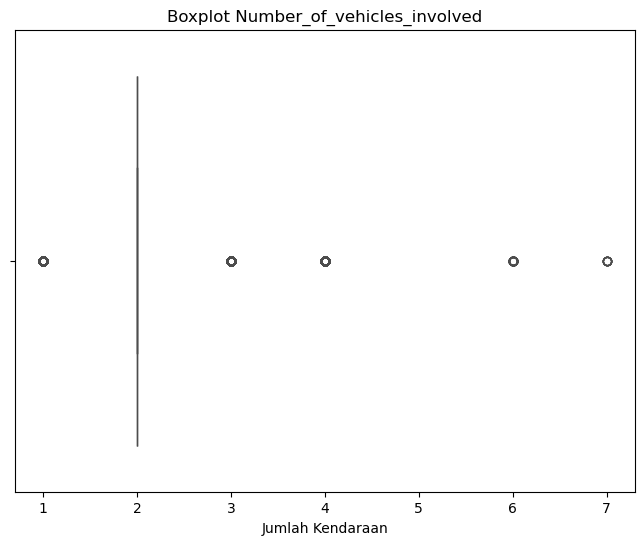

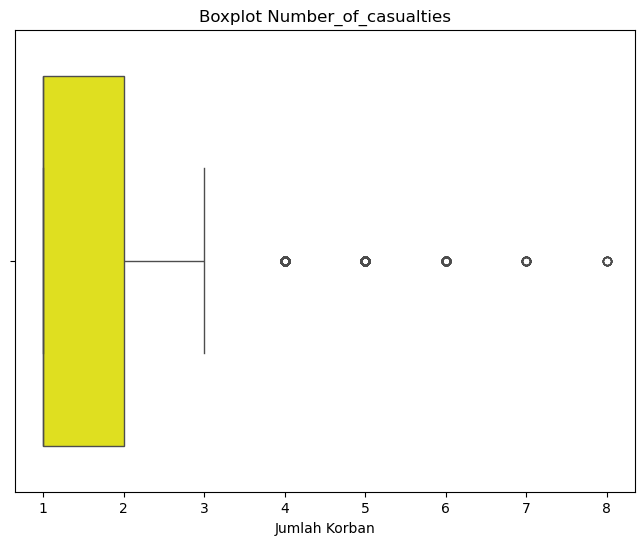

In [157]:
# Boxplot untuk Number_of_vehicles_involved
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_encoded_mix['Number_of_vehicles_involved'], color='blue')
plt.title('Boxplot Number_of_vehicles_involved')
plt.xlabel('Jumlah Kendaraan')
plt.show()

# Boxplot untuk Number_of_casualties
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_encoded_mix['Number_of_casualties'], color='yellow')
plt.title('Boxplot Number_of_casualties')
plt.xlabel('Jumlah Korban')
plt.show()

<h1> Feature Selection

<h2> Korelasi

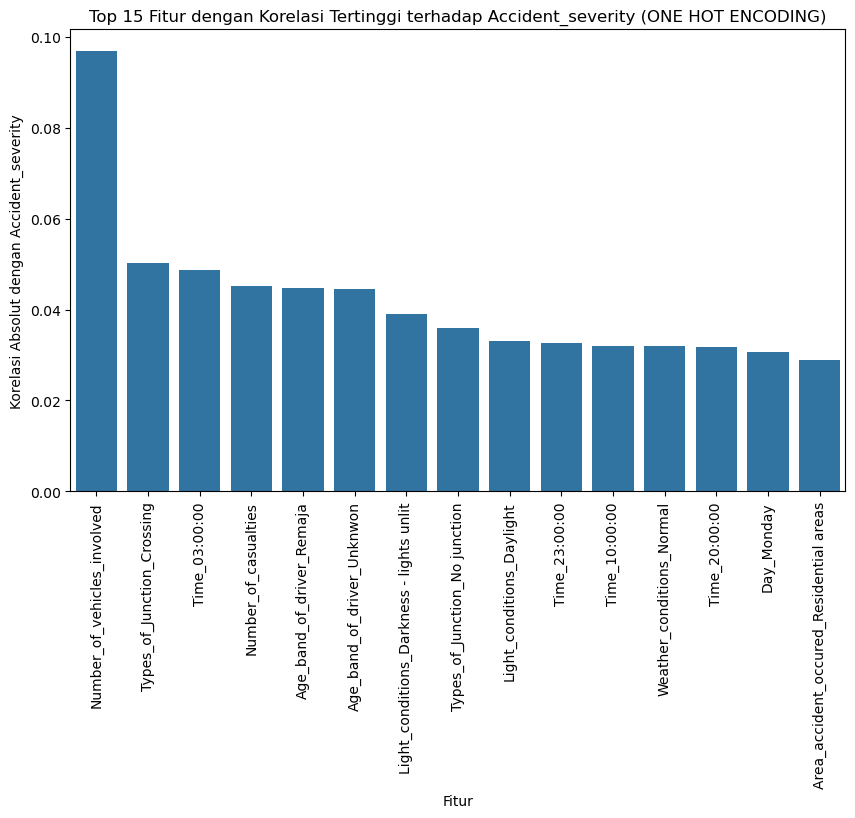

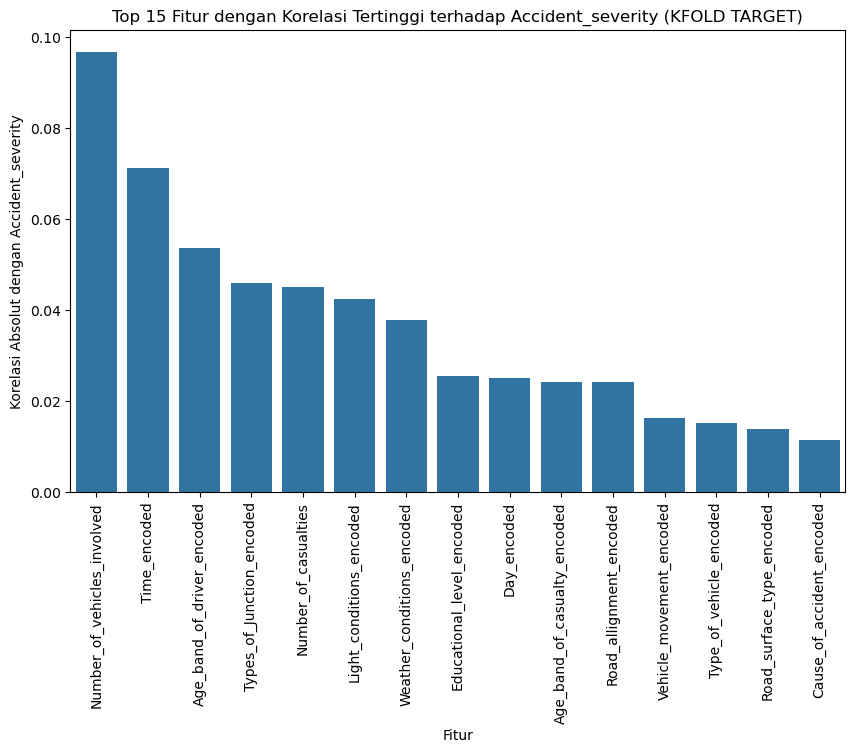

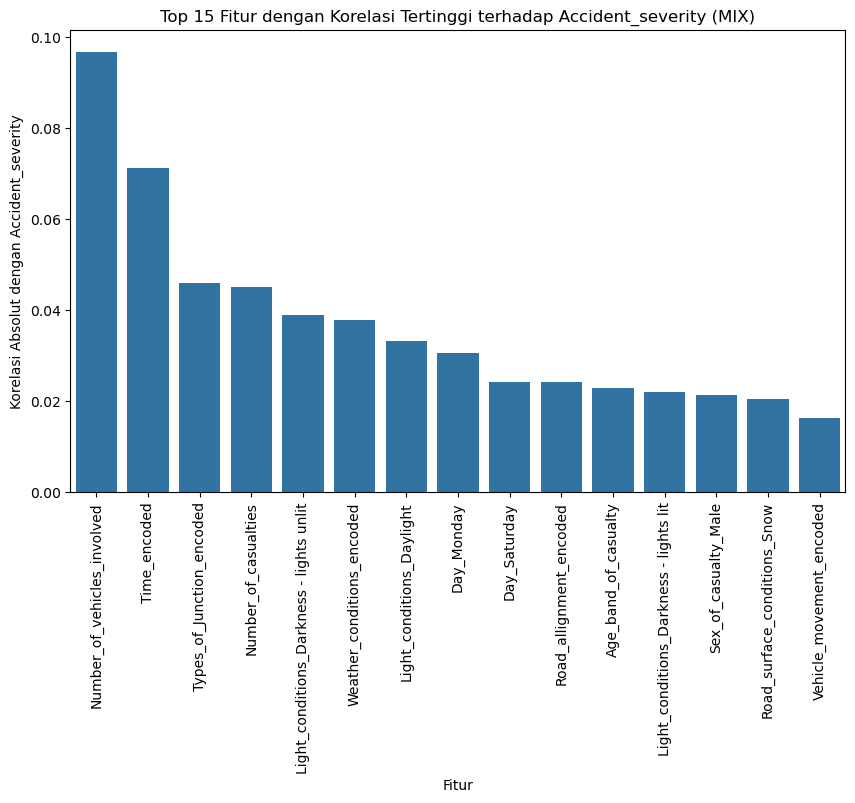

['Educational_level',
 'Driving_experience',
 'Service_year_of_vehicle',
 'Casualty_severity',
 'Sex_of_driver_Female',
 'Sex_of_driver_Male',
 'Vehicle_driver_relation_Employee',
 'Vehicle_driver_relation_Other',
 'Vehicle_driver_relation_Unknown',
 'Owner_of_vehicle_Governmental',
 'Owner_of_vehicle_Organization',
 'Road_surface_type_Asphalt roads',
 'Road_surface_type_Earth roads',
 'Road_surface_type_Gravel roads',
 'Road_surface_type_Other',
 'Road_surface_conditions_Dry',
 'Road_surface_conditions_Flood over 3cm. deep',
 'Road_surface_conditions_Wet or damp',
 'Sex_of_casualty_Female',
 'Fitness_of_casuality_Deaf',
 'Fitness_of_casuality_Normal',
 'Fitness_of_casuality_unknown',
 'Day_Friday',
 'Day_Sunday',
 'Day_Thursday',
 'Day_Tuesday',
 'Day_Wednesday',
 'Area_accident_occured_encoded',
 'Lanes_or_Medians_encoded',
 'Type_of_collision_encoded',
 'Pedestrian_movement_encoded']

In [166]:
# ohe
corr_matrix = df_encoded_ohe.corr()
target_corr = corr_matrix["Accident_severity"].drop("Accident_severity")

plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.abs().sort_values(ascending=False)[:15].index,
            y=target_corr.abs().sort_values(ascending=False)[:15])
plt.xticks(rotation=90)
plt.xlabel("Fitur")
plt.ylabel("Korelasi Absolut dengan Accident_severity")
plt.title("Top 15 Fitur dengan Korelasi Tertinggi terhadap Accident_severity (ONE HOT ENCODING)")
plt.show()

low_corr_features = target_corr[abs(target_corr) < 0.01].index.tolist()
low_corr_features

# kfold
corr_matrix = df_encoded_kfold.corr()
target_corr = corr_matrix["Accident_severity"].drop("Accident_severity")

plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.abs().sort_values(ascending=False)[:15].index,
            y=target_corr.abs().sort_values(ascending=False)[:15])
plt.xticks(rotation=90)
plt.xlabel("Fitur")
plt.ylabel("Korelasi Absolut dengan Accident_severity")
plt.title("Top 15 Fitur dengan Korelasi Tertinggi terhadap Accident_severity (KFOLD TARGET)")
plt.show()

low_corr_features = target_corr[abs(target_corr) < 0.01].index.tolist()
low_corr_features

# mix
corr_matrix = df_encoded_mix.corr()
target_corr = corr_matrix["Accident_severity"].drop("Accident_severity")

plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.abs().sort_values(ascending=False)[:15].index,
            y=target_corr.abs().sort_values(ascending=False)[:15])
plt.xticks(rotation=90)
plt.xlabel("Fitur")
plt.ylabel("Korelasi Absolut dengan Accident_severity")
plt.title("Top 15 Fitur dengan Korelasi Tertinggi terhadap Accident_severity (MIX)")
plt.show()

low_corr_features = target_corr[abs(target_corr) < 0.01].index.tolist()
low_corr_features

<h2> Lasso

Fitur yang dipilih oleh Lasso:
['Age_band_of_driver', 'Educational_level', 'Driving_experience', 'Service_year_of_vehicle', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Age_band_of_casualty', 'Casualty_severity', 'Sex_of_driver_Female', 'Sex_of_driver_Unknown', 'Vehicle_driver_relation_Employee', 'Vehicle_driver_relation_Other', 'Vehicle_driver_relation_Owner', 'Owner_of_vehicle_Governmental', 'Owner_of_vehicle_Organization', 'Owner_of_vehicle_Other', 'Owner_of_vehicle_Owner', 'Road_surface_type_Asphalt roads', 'Road_surface_type_Asphalt roads with some distress', 'Road_surface_type_Earth roads', 'Road_surface_type_Gravel roads', 'Road_surface_type_Other', 'Road_surface_conditions_Dry', 'Road_surface_conditions_Snow', 'Road_surface_conditions_Wet or damp', 'Light_conditions_Darkness - lights lit', 'Light_conditions_Darkness - lights unlit', 'Light_conditions_Daylight', 'Sex_of_casualty_Male', 'Sex_of_casualty_unknown', 'Fitness_of_casuality_Blind', 'Fitness_of_casuality_Norm

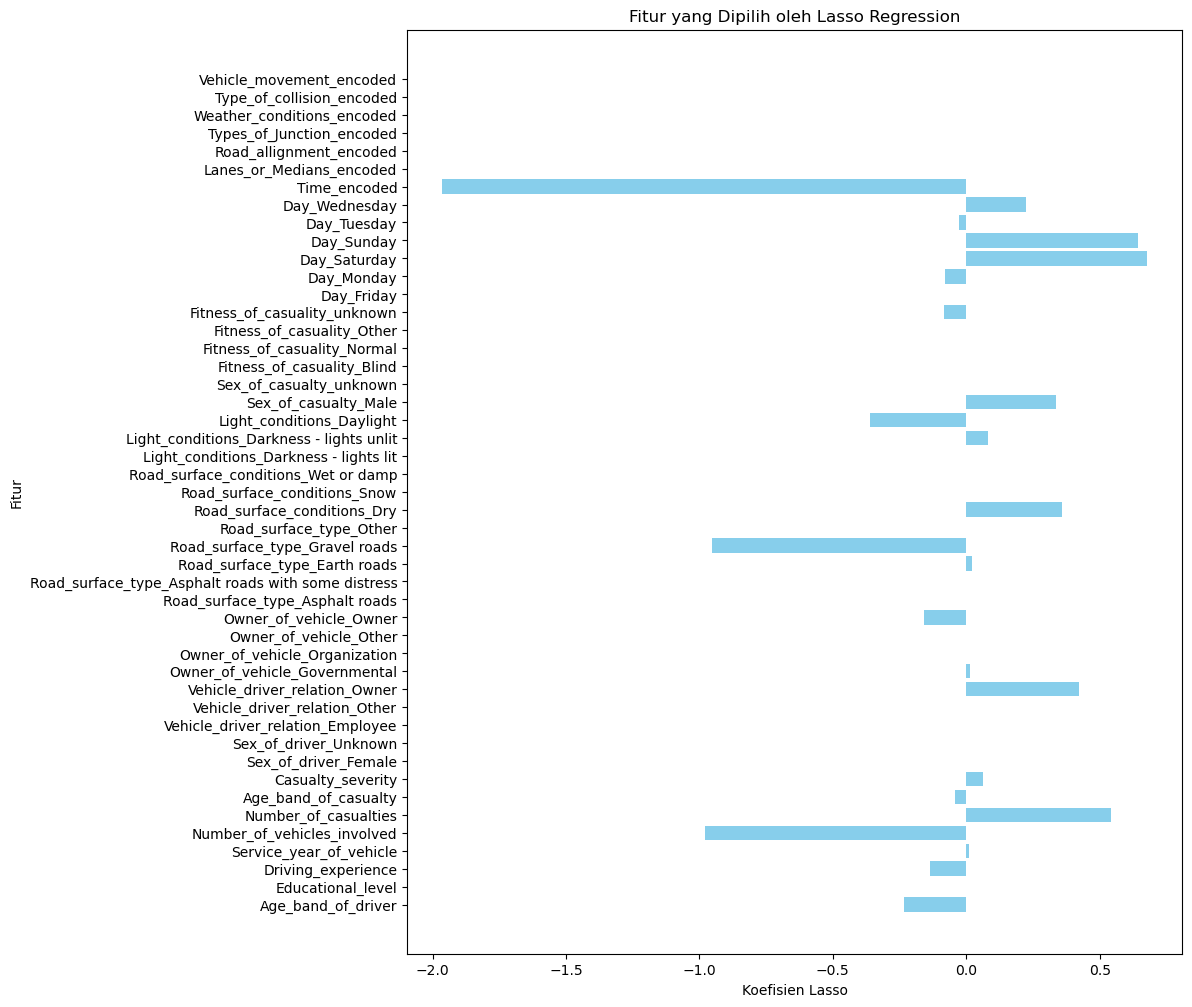

In [165]:
lasso = LogisticRegression(penalty="l1", solver="liblinear", random_state=42)
lasso.fit(X_train_mix, y_train_mix)

model = SelectFromModel(lasso, prefit=True)
selected_lasso_features = X_train_mix.columns[model.get_support()].tolist()

print("Fitur yang dipilih oleh Lasso:")
print(selected_lasso_features)

coefficients = lasso.coef_[0]

selected_coefficients = coefficients[[X_train_mix.columns.get_loc(f) for f in selected_lasso_features]]

plt.figure(figsize=(10, 12))
plt.barh(selected_lasso_features, selected_coefficients, color='skyblue')
plt.xlabel('Koefisien Lasso')
plt.ylabel('Fitur')
plt.title('Fitur yang Dipilih oleh Lasso Regression')
plt.show()